In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [268]:
df_train = pd.read_csv("../data/clean_train.csv")
df_train.head(3)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,child,cabin_deck,solo
0,0,lower,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,unknown,s,0,u,0
1,1,upper,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c,0,c,0
2,1,lower,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,unknown,s,0,u,1


In [269]:
global_survivorship = df_train['survived'].mean()
global_survivorship

np.float64(0.3838383838383838)

In [270]:
df_train.groupby('cabin').size().sort_values

<bound method Series.sort_values of cabin
a10          1
a14          1
a16          1
a19          1
a20          1
          ... 
f_g63        1
f_g73        2
g6           4
t            1
unknown    687
Length: 148, dtype: int64>

In [271]:
numerical_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'cabin', 'cabin_deck', 'solo', 'child']

In [272]:
for column in df_train.columns:
    print(df_train[column].value_counts())
    print()

survived
0    549
1    342
Name: count, dtype: int64

pclass
lower     491
upper     216
middle    184
Name: count, dtype: int64

name
braund,_mr._owen_harris                                1
cumings,_mrs._john_bradley_(florence_briggs_thayer)    1
heikkinen,_miss._laina                                 1
futrelle,_mrs._jacques_heath_(lily_may_peel)           1
allen,_mr._william_henry                               1
                                                      ..
montvila,_rev._juozas                                  1
graham,_miss._margaret_edith                           1
johnston,_miss._catherine_helen_"carrie"               1
behr,_mr._karl_howell                                  1
dooley,_mr._patrick                                    1
Name: count, Length: 891, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1

# Survivor rate

In [273]:
# If survior ratio is greater than 1, the category is more likely to survive, and if the ratio is lower than 1,the category is less likely to survive.

for c in categorical_features:
    print(c)
    df_group = df_train.groupby(c).survived.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_survivorship
    df_group['survive_ratio'] = df_group['mean'] / global_survivorship
    display(df_group)
    print()
    print()

pclass


,mean,count,diff,survive_ratio
pclass,,,,
lower,0.242363,491,-0.141476,0.631418
middle,0.472826,184,0.088988,1.231836
upper,0.629630,216,0.245791,1.640351




sex


,mean,count,diff,survive_ratio
sex,,,,
female,0.742038,314,0.35820,1.933205
male,0.188908,577,-0.19493,0.492155




embarked


,mean,count,diff,survive_ratio
embarked,,,,
c,0.553571,168,0.169733,1.442199
q,0.389610,77,0.005772,1.015038
s,0.336957,644,-0.046882,0.877860
unknown,1.000000,2,0.616162,2.605263




cabin


,mean,count,diff,survive_ratio
cabin,,,,
a10,0.000000,1,-0.383838,0.000000
a14,0.000000,1,-0.383838,0.000000
a16,1.000000,1,0.616162,2.605263
a19,0.000000,1,-0.383838,0.000000
a20,1.000000,1,0.616162,2.605263
...,...,...,...,...
f_g63,0.000000,1,-0.383838,0.000000
f_g73,0.000000,2,-0.383838,0.000000
g6,0.500000,4,0.116162,1.302632




cabin_deck


,mean,count,diff,survive_ratio
cabin_deck,,,,
a,0.466667,15,0.082828,1.215789
b,0.744681,47,0.360842,1.940090
c,0.593220,59,0.209382,1.545495
d,0.757576,33,0.373737,1.973684
e,0.750000,32,0.366162,1.953947
f,0.615385,13,0.231546,1.603239
g,0.500000,4,0.116162,1.302632
t,0.000000,1,-0.383838,0.000000
u,0.299854,687,-0.083984,0.781200




solo


,mean,count,diff,survive_ratio
solo,,,,
0,0.505650,354,0.121811,1.317351
1,0.303538,537,-0.080300,0.790797




child


,mean,count,diff,survive_ratio
child,,,,
0,0.367397,822,-0.016442,0.957165
1,0.579710,69,0.195872,1.510297


# Mutual information

In [274]:
from sklearn.metrics import mutual_info_score

def mutual_info_survive_score(series):
    return mutual_info_score(series, df_train.survived)

In [275]:
mi = df_train[categorical_features].apply(mutual_info_survive_score)
mi.sort_values(ascending=False)

cabin         0.165236
sex           0.150870
pclass        0.058107
cabin_deck    0.055122
solo          0.020593
embarked      0.016668
child         0.006588
dtype: float64

# Feature importance: Correlation

In [276]:
df_train[numerical_features].corrwith(df_train.survived).abs()

age      0.069809
sibsp    0.035322
parch    0.081629
fare     0.257307
dtype: float64

## Kids

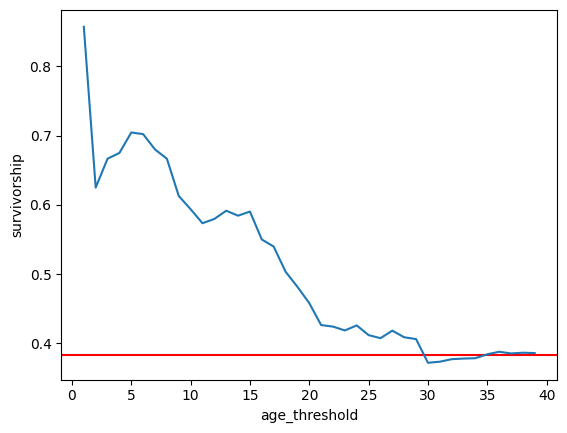

In [277]:
kids_score = []
for kid_age_threshold in range(1, 40):
    kids_score.append((df_train[df_train.age <= kid_age_threshold].survived.mean(), kid_age_threshold))
df_kids = pd.DataFrame(kids_score, columns=['survivorship', 'age_threshold'])

plt.xlabel('age_threshold')
plt.ylabel('survivorship')
plt.axhline(y=global_survivorship, label='sadasdasddf', c='red')
plt.plot(df_kids['age_threshold'], df_kids['survivorship'])

In [278]:
print(df_train[df_train.age <= 2].survived.mean())
print(df_train[(df_train.age > 2) & (df_train.age <= 10)].survived.mean())
print(df_train[(df_train.age > 10) & (df_train.age <= 19)].survived.mean())

0.625
0.575
0.41


In [279]:
def make_crosstab_plot(c1: str, c2: str):
    plt.figure(figsize=(8, 6))
    # survive_rate = df_train.groupby([c1, c2])['survived'].agg('mean').reset_index()
    ctab = pd.crosstab(df_train[c1], df_train[c2], values=df_train['survived'], aggfunc=['mean', 'sum'])
    sns.heatmap(ctab, cmap='coolwarm', annot=True)


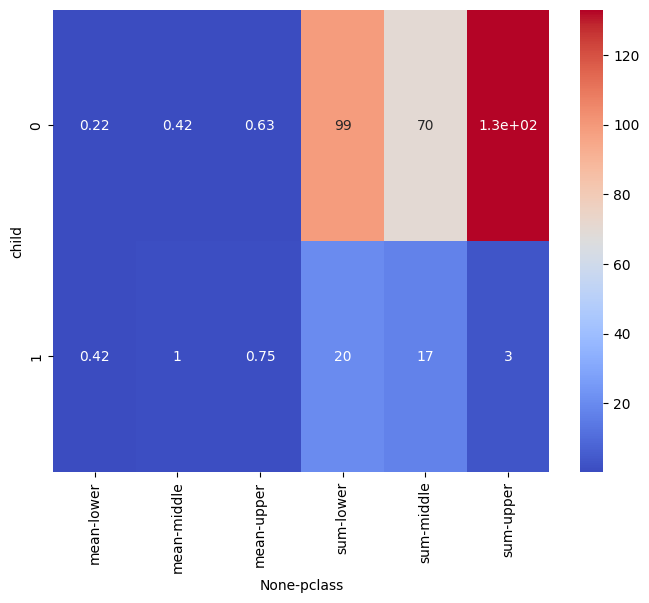

In [280]:
make_crosstab_plot('child', 'pclass')

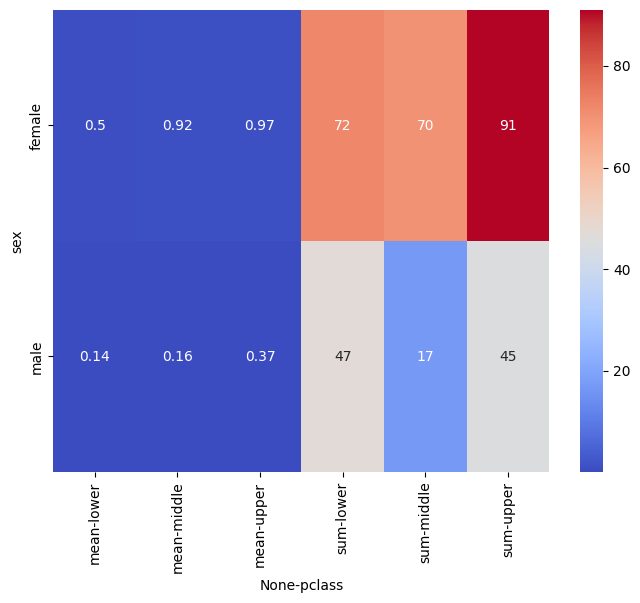

In [281]:
make_crosstab_plot('sex', 'pclass')

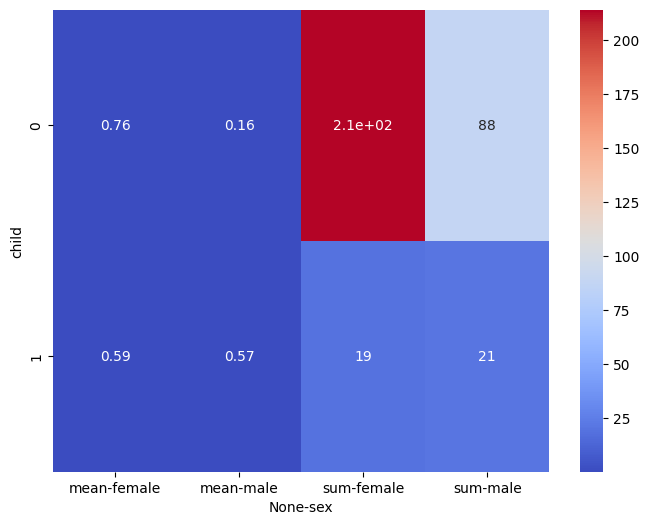

In [282]:
make_crosstab_plot('child', 'sex')

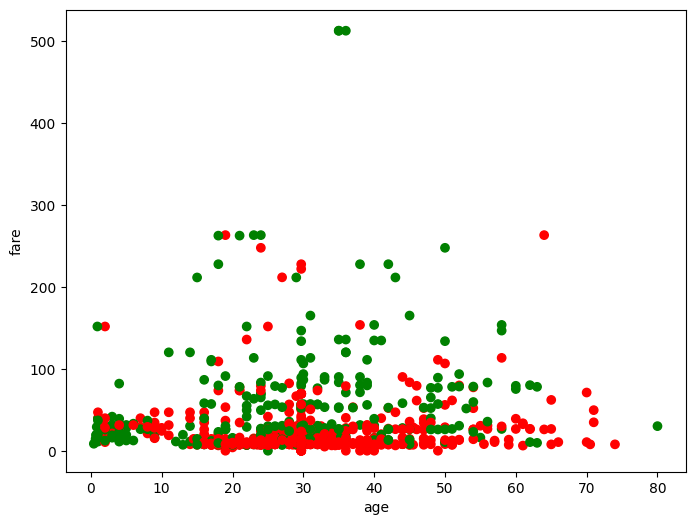

In [285]:
colors = df_train['survived'].map({0: 'red', 1: 'green'})
plt.figure(figsize=(8,6))
plt.xlabel('age')
plt.ylabel('fare')

plt.scatter(df_train['age'], df_train['fare'], c=colors)

In [284]:
print(df_train[(df_train.fare <= 50) & (df_train.age > 16)].survived.mean())
print(df_train[(df_train.fare > 50) & (df_train.age > 16)].survived.mean())

0.2895148669796557
0.6710526315789473
